<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-in-tensorflow/blob/main/Keras_Linear_Equation_Problem_linearRegression_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras Based Linear Regression Analysis: Part 3
* Create a linear test data (upto a 1000 samples) and introduce noise, to simulate real-life data.
* Create a new linear equation based on the data and visualize it
* Split the data and use it for training and testing
* Generate an algorithm based on the training data and use it to generate a prediction on the test data
* Get the accuracy report
* Visaulise the result

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
plt.style.use('grayscale')

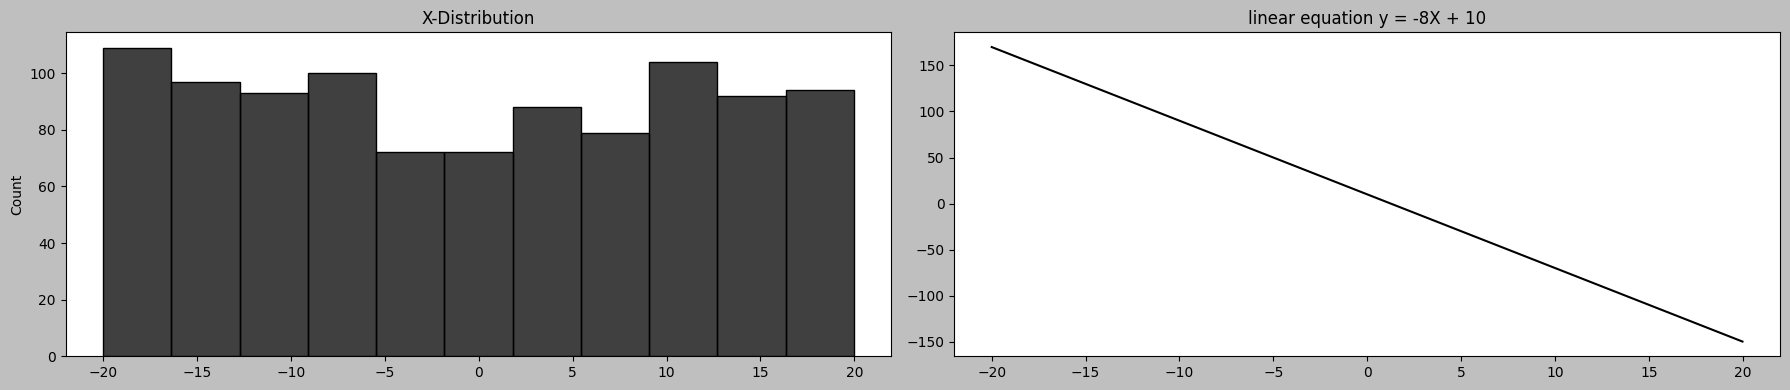

In [2]:
# Create an input data (upto 1000)
X = np.random.uniform(-20, 20, 1000)

# Create the linear equation: y = -8X + 10
y = np.multiply(-8, X) + 10
# y = -8*X + 10

#vizualise
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
sns.histplot(X)
plt.title('X-Distribution')
plt.subplot(1,2,2)
sns.lineplot(x=X, y=y)
plt.title("linear equation y = -8X + 10")
plt.tight_layout()
plt.show()

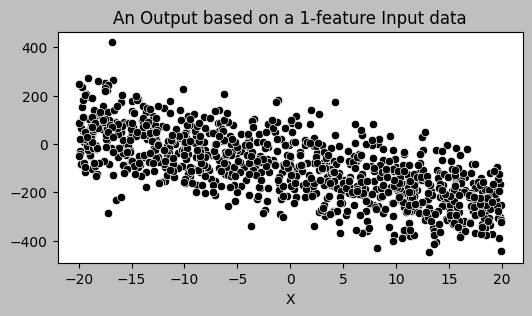

In [3]:
# Introduce noise to output y
np.random.seed(42)
noise = 100*np.random.randn(1000)
y = np.subtract(np.multiply(-8, X), 100) + noise #y = -8X + 100 + noise
plt.figure(figsize=(6,3))
sns.scatterplot(x=X,
                y=y)
plt.title("An Output based on a 1-feature Input data")
plt.xlabel("X")
plt.show()

In [4]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(750, 250, 750, 250)

In [5]:
# Lets model and get prediction

# 1. instantiate the model, add layers without activations functions, 1 neuron in the hidden layer and the outout layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))

# 2. Compile for error/loss, Optimise and check for acccuracy (metrics of mae/mse/cross entropy and etc)
model.compile(
    loss=tf.keras.losses.mse,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# 3. fit the model and store history
history = model.fit(X_train, y_train, epochs=200, verbose=0)

In [6]:
print('The accuracy output shows all zero values=', set(history.history['accuracy']))

The accuracy output shows all zero values= {0.0}


In [92]:
X_train.reshape(-1,1).shape

(750, 1)

In [7]:
# Lets scale the data and re-fit, scaling is done only for the input data # X_train_scaled.min(), X_train_scaled.max()

# instantiate the scaler
mm = MinMaxScaler()
X_train_scaled = mm.fit_transform(X_train.reshape(-1,1))
X_test_scaled = mm.fit_transform(X_test.reshape(-1,1))

In [8]:
# Lets model and get prediction using the scaled data

# 1. instantiate the model, add layers without activations functions, 1 neuron in the hidden layer and the outout layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))

# 2. Compile for error/loss, Optimise and check for acccuracy (metrics of mae/mse/cross entropy and etc)
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# 3. fit the model and store history
history = model.fit(X_train_scaled, y_train.reshape(-1,1), epochs=200, verbose=0)

* So it looks like for regression problems accuracy might not after all be an appropriate metric.

In [102]:
set(history.history['accuracy'])

{0.0}

In [9]:
# Lets use a different metric without scaling

# 1. instantiate the model, add layers without activations functions, 1 neuron in the hidden layer and the outout layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))

# 2. Compile for error/loss, Optimise and check for acccuracy (metrics of mae/mse/cross entropy and etc)
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=tf.keras.metrics.mse
)

# 3. fit the model and store history
history = model.fit(X_train, y_train, epochs=200, verbose=0)

In [10]:
history.history['loss'][0], history.history['mean_squared_error'][0] ,history.history['loss'][-1], history.history['mean_squared_error'][-1]

(127.19912719726562, 24136.447265625, 89.36136627197266, 12192.677734375)

In [11]:
y_pred = model.predict(X_test, verbose=0)

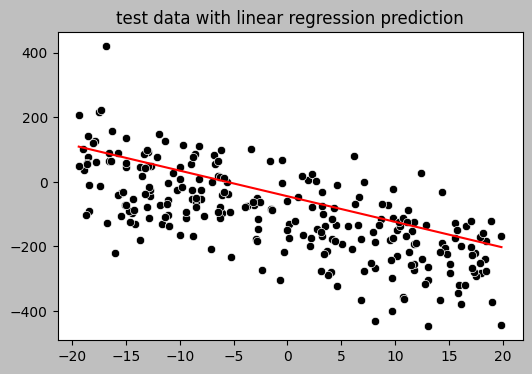

In [13]:
#plot the predicted againse the test scatter plot

plt.figure(figsize=(6,4))
plt.title('test data with linear regression prediction')
sns.scatterplot(x=X_test, y=y_test)
sns.lineplot(x=X_test, y=y_pred.reshape(-1,), color='red')
plt.show()

In [ ]:
#Lets evaluate the result
model.evaluate(y_pred, y_test,)

In [41]:
# Get the weights and biases and compare it the real weight and bias: y = -8X + 100 + noise
print('Weight=',model.layers[0].get_weights()[0][0][0],',', 'Bias=', model.layers[0].get_weights()[1][0] )

Weight= -7.9234834 , Bias= -44.264477


In [38]:
model.layers[0].get_weights()[1]

-44.264477